<a href="https://colab.research.google.com/github/steimel60/ML/blob/main/DeepLearning/fastai_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastbook import *

In [3]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images' #Get dataset path

def is_cat(x): return x[0].isupper()

#Load images
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224)
)

#Use award winning cnn model
learn = cnn_learner(dls,resnet34, metrics=error_rate)
learn.fine_tune(1) #fine_tune is how we fit on pretrained data

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:265: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,0.164282,0.017199,0.006766,00:56


epoch,train_loss,valid_loss,error_rate,time
0,0.061079,0.013779,0.004060,01:17


In [5]:
uploader = widgets.FileUpload() #Upload my own image
uploader

FileUpload(value={}, description='Upload')

In [7]:
img = PILImage.create(uploader.data[0])
is_cat,_,probs = learn.predict(img) #Test own image
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: True.
Probability it's a cat: 1.000000


In [8]:
#Image segmentation example
path = untar_data(URLs.CAMVID_TINY)
#Load data
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames=get_image_files(path/"images"),
    label_func=lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes=np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1142: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


epoch,train_loss,valid_loss,time
0,2.852129,2.454686,00:02


epoch,train_loss,valid_loss,time
0,1.758755,1.648877,00:02
1,1.499862,1.323123,00:02
2,1.364269,1.267552,00:02
3,1.212407,0.935333,00:02
4,1.095662,0.853600,00:02
5,0.995486,0.824190,00:02
6,0.911000,0.776707,00:02
7,0.845478,0.784209,00:02


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1142: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


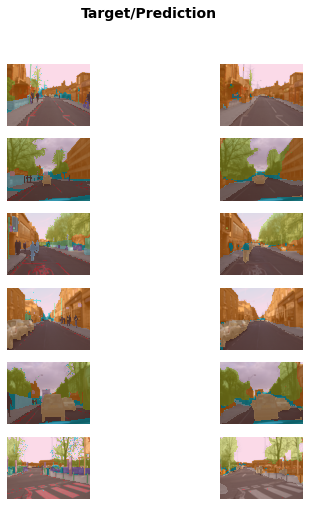

In [9]:
learn.show_results(max_n=6, figsize=(7,8))

In [10]:
from fastai.text.all import *

In [ ]:
dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')

learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=.5, metrics=accuracy)
learn.fine_tune(4, .01)

epoch,train_loss,valid_loss,accuracy,time
0,0.467107,0.397677,0.820520,03:17


epoch,train_loss,valid_loss,accuracy,time
0,0.300077,0.245585,0.900840,07:02
1,0.243122,0.214057,0.914480,07:00
2,0.180150,0.193677,0.926600,07:01


In [ ]:
learn.predict("I really liked that movie!")

In [ ]:
from fastai.tabular.all import *

In [ ]:
#Salary predictions based on socioeconomic backgrounds
path = untar_data(URLs.ADULT_SAMPLE)

#Load data, cat_names = categorical, cont_names = continuous
dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names='salary',
                                  cat_names=['workclass', 'education', 'marital-status', 'occupation',
                                             'relationship', 'race'],
                                  cont_names=['age', 'fnlwgt', 'education-num'],
                                  procs=[Categorify, FillMissing, Normalize])

learn = tabular_learner(dls, metrics=accuracy)
learn.fit_one_cycle(3)

In [ ]:
from fastai.collab import *

In [ ]:
#Predict ratings based on other ratings (i.e. a recomendation system)
path = untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(dls, y_range=(.5,5.5))
learn.fine_tune(10)
learn.show_results()